# P1 Characteristics of Quantum Wavefunctions

:::{admonition} **What you need to know**

- The **finite depth box** is a more realistic model compared to the infinite potential well, as it allows for the possibility of quantum tunneling, where the particle has a non-zero probability of being found outside the well. 
- The potential energy function is finite in the central region and zero outside. The time-independent Schrödinger equation is solved in three regions, with different forms of wavefunctions in each. - Bound states are possible due to the confinement of the particle, but the energy levels are determined by matching the wavefunction and its derivative at the boundaries, leading to transcendental equations. 
- Unlike the infinite well, the number of bound states is finite, and the wavefunctions extend slightly outside the well, illustrating the quantum tunneling effect. 
- Understanding the **boundary conditions** and the **behavior of the wavefunctions** in each region is key to solving this problem.
:::

**Acknowledgement**
> These Jupyter notebooks is based on the excellent paper by [J Chem. Educ. 2019, 96, 8, 1663–1670](https://doi.org/10.1021/acs.jchemed.9b00195)

## Quantum objects can go where no classical partciles are allowed!


:::{figure-md} markdown-fig
<img src="./images/tunnel1.png" alt="pib1" class="bg-primary mb-1" width="800px">

1. Nordheim square tunnel barrier  for electron tunneling from bound states into the continuum
2. Nitrogen inversion in the ammonia molecule is achieved by excitation to a vibrational excited state followed by tunneling through the barrier, proposed by George Uhlenbeck in 1932
3. Esaki tunnel diode with heavily doped p- and n-type semiconductors. At small voltages, electrons and holes tunnel through the semiconductor bandgap across a junction that is only about 10 nm wide.
:::

<div style="text-align: center;">
<iframe width="560" height="315" src="https://www.youtube.com/embed/Yg0LT3n4mYY?si=yIxDAvxxFRzQ8z1J" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</div>

### Qualitative trends in wavefunction beahviour

:::{figure-md} markdown-fig
<img src="./images/gen_psi1.png" alt="pib1" class="bg-primary mb-1" width="400px">

Judging by the signs of the various terms of schrodinger equation we can predict qualtiatively how wavefunction would beahave. 
:::


:::{figure-md} markdown-fig
<img src="./images/gen_psi2.png" alt="pib1" class="bg-primary mb-1" width="400px">

Example of a stepped potential and expected behaviour of the wavefunction.
:::

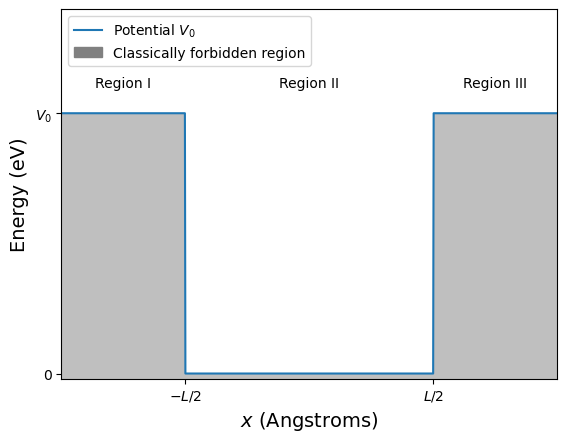

In [ ]:
###############################################################################################
#
#  The cell contains all of the libraries used in the notebook, either run all cells or
#  execute the cells in order starting with this. 
#
#  In google colab run all is ctrl+F8 or select "run all" from the runtime menu above
#
###############################################################################################

import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from scipy import optimize

import warnings
warnings.filterwarnings('ignore')

#widget modules, to allow interaction with plots
from ipywidgets import interactive
import ipywidgets as widgets
#IPython for inteactive outputs from cells
from IPython.display import display, HTML, Image, Markdown

#To animate the 3D plots and produce movies
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

#Use to test the system, different response from some code
#depending on whether the notebook is being compiled into a webpage, 
#run in jupyter or in google colab.
import sys
import psutil

IN_COLAB = 'google.colab' in sys.modules
PARENT_PROC = psutil.Process().parent().cmdline()[-1]

#set variable to identify the environment for execution.
if 'jupyter-lab' in PARENT_PROC:
    interactive_env = True
elif 'jupyter-notebook' in PARENT_PROC:
    interactive_env = True
elif IN_COLAB:
    interactive_env = True
else:
    interactive_env = False
#function to produce complex number from Euler form.
def P2R(radii, angles):
    return radii * np.exp(1j*angles)

#constants used later
hbar = 1.05457180013e-34 # planck's constant divided by 2*pi, in Joules*second
melec = 9.10938356e-31 # mass of an electron in kg
eVtoJ = 1.60217662e-19 # conversion factor from eV to Joules
AngstromtoMeter = 1e-10 # conversion factor from Angstroms to meters
val = np.sqrt(2.0*melec*eVtoJ)*AngstromtoMeter/(2.0*hbar) # prefactor sqrt(2*melec)/(2*hbar), for when L is in angstroms and Vo is in eV

#####


fig_no = 1
def potential(x, Vo, L):
    Vx=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<=-L/2 or x[i]>=L/2:
            Vx[i]=Vo
        

    return Vx

L=10
Vo=5

fig, ax=plt.subplots()

#create and plot the potential
x = np.linspace(-L, L, 1000)
Vx = potential(x, Vo, L)
ax.plot(x,Vx, label='Potential $V_0$')

ax.set_ylim(-.1,Vo*1.4)
ax.set_xlim(-L,L)
ax.set_xlabel(r'$x$ (Angstroms)', fontsize=14)
ax.set_ylabel(r'Energy (eV)', fontsize=14);

#label the three regions of the potential
ax.annotate('Region I',xy=(-3*L/4,Vo*1.1), ha='center')
ax.annotate('Region II',xy=(0,Vo*1.1), ha='center')
ax.annotate('Region III',xy=(3*L/4,Vo*1.1), ha='center')

#generic plot, label interms of width L and depth Vo
ax.set_yticks([0, Vo])
ax.set_yticklabels(['0','$V_0$'])
ax.set_xticks([-L/2, L/2])
ax.set_xticklabels(['$-L/2$','$L/2$'])

#highlight the classically forbidden region in gray
ax.bar(-3*L/4, Vo, width=L/2, color='gray', alpha=0.5)
ax.bar(3*L/4, Vo, width=L/2, color='gray', alpha=0.5)
ax.bar(0, -0.1, width=2*L, color='gray', alpha=0.5)

patch = mpatches.Patch(color='gray', label='Classically forbidden region')
handles, labels = ax.get_legend_handles_labels()
handles.append(patch)
ax.legend(handles=handles, loc=2);

plt.show()


### Solutions inside square well

Inside the finite square well, the region $-L/2 \le x \le L/2$, the potential $V(x)=0$ so the Schrödinger equation,

$$
\frac{-\hbar^2}{2m}\frac{d^2\psi(x)}{d{x}^2}+V(x)\psi(x) =E\psi(x)
$$ 


$$
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{d{x}^2}=E\psi(x)
\frac{d^2\psi(x)}{d{x}^2}=-\frac{2mE}{\hbar^2}\psi(x)
=-k^2\psi(x)
$$ 


- Solutions to this equations have the form showing oscillatory profile for wavefunction 

$$
\psi(x)=A_1e^{ikx}+B_1e^{-ikx}\\
       =A\sin(kx)+B\cos(kx)
$$ 


### Solutions outside the well

In the regions where $x < -L/2$ and $x > L/2$, the potential is $V(x) = V_0$. The time-independent Schrödinger equation for these regions can be written as:

$$
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V_0\psi(x) = E\psi(x),
$$



$$
\frac{d^2\psi(x)}{dx^2} = -\frac{2m(E - V_0)}{\hbar^2} \psi(x),
$$



$$
\frac{d^2\psi(x)}{dx^2} = -k^2 \psi(x),
$$

- where $k^2 = \frac{2m(V_0 - E)}{\hbar^2}$. The value of $k$ will differ in each region of the potential well depending on the energy and potential.

**What happens when $E < V_0$?**

- When the particle's energy is less than the potential outside the well $(E < V_0)$, the term $E - V_0$ becomes negative. This makes $k^2 = \frac{2m(V_0 - E)}{\hbar^2}$, which means $k$ is real, and the solution in this region involves an exponential decay (i.e., evanescent wave). Therefore, $k$ is no longer purely imaginary, and the wavefunction decays exponentially as the particle penetrates into the classically forbidden regions outside the well.


### Profile of the full wavefunction

Our potential well is composed of three regions and the particle will have an energy less than the potentail, i.e. $E<V_0$. In order that the wavefunction can be normalised we make the following choices so that as $x\rightarrow\pm\infty$ the value of $\psi(x)\rightarrow 0$. We will also choose the trigonometic form of the wavefunction inside the potential, recall this is to make the maths easier.

$$
\text{Region I:  }  V(x) = V_0 ~~~~~~~~~~~~~~~~ x \leq-\frac{L}{2} ~~~~~ \psi_{I} = A e^{\beta  x} \\
\text{Region II: }  V(x) = 0 ~~~ -\frac{L}{2} \leq x \leq\frac{L}{2} ~~~~~~~ \psi_{II} = B \cos(k x) + C \sin(k x)\\
\text{Region III:}  V(x) = V_0 ~~~~~~~~~~~~~~  x \geq \frac{L}{2}  ~~~~~~~ \psi_{III} = D e^{-\beta x}
$$


**Why do we check for continuity?**

- $\psi^{'}$ needs to be continuous to guarantee the existence of $\psi^{''}$, whose existence is required from the first postulate.  

- $\large{\frac{d^2}{dx^2}}$ is a component of the kinetic energy operator. If the wavefucntion doesn't have a well-defined second derivative, then the kinetic energy would be undefined, which is not possible.


### Boundary conditions

The wavefunction will be the sum of all three components so we make sure that the wavefunction and it's first derivative are continuous at any boundary. We apply the following boundary conditions to achive this

$$
\psi_{I}\left(-\frac{L}{2}\right) = \psi_{II}\left(-\frac{L}{2}\right)  \text{  and  } 
\psi_{II}\left(\frac{L}{2}\right) = \psi_{III}\left(\frac{L}{2}\right).
$$

$$
\psi^{'}_{I}\left(-\frac{L}{2}\right) = \psi^{'}_{II}\left(-\frac{L}{2}\right)  \text{  and  }
\psi^{'}_{II}\left(\frac{L}{2}\right) = \psi^{'}_{III}\left(\frac{L}{2}\right)
$$

note there are two conditions for each boundary so we will endup with 2 sets of 2 simultanious equations.

### Even and odd solutions

Finally, our potential is symmetric about $x=0$ so our wavefunction will either be a maximum or zero at $x=0$ so that the probability distribution is symmetric about $x=0$. We will call these even for $\psi(x)=\psi(x)$ and odd when $\psi(x)=-\psi(-x)$.

**Even solutions:**

$$
x \leq-\frac{L}{2}: ~~~ \psi_{I}(x) = A e^{\beta  x} \\
-\frac{L}{2} \leq x \leq\frac{L}{2}: ~~~ \psi_{II}(x) = B \cos(k x) \\
x \geq \frac{L}{2}: ~~~ \psi_{III}(x) = D e^{-\beta x}
$$



- These are called **even solutions** because the function $\cos(kx)$ is even, i.e. it is symmetric about $x=0$. However, they will correspond to the odd values of $n$. 


- After imposing the boundary conditions we reach the following relation:

$$
\beta = k\tan\left(k\frac{L}{2}\right)\Rightarrow \sqrt{V_o-E} = \sqrt{E}\tan\left(\frac{L\sqrt{2mE}}{2\hbar}\right)
$$(fsw_odd_sol_equ)

**Odd solutions:**

$$
x \leq-\frac{L}{2}:  ~~~ \psi_{I}(x) = -A e^{\beta  x} \\
-\frac{L}{2} \leq x \leq\frac{L}{2}:  ~~~ \psi_{II}(x) = C \sin(k x) \\
x \geq \frac{L}{2}:  ~~~ \psi_{III}(x) = D e^{-\beta x}
$$

- These are called **odd solutions** because the function $\sin(kx)$ is odd, i.e. it is anti-symmetric about $x=0$. However, they will correspond to the even values of $n$. This is a bit confusing I know but the choice of $n$ is arbitrary! The sine and cosine solutions however are determined by the physics. 

- After imposing the boundary conditions we reach the following relation:

$$
\beta = -\frac{k}{\tan\left(k\frac{L}{2}\right)} \Rightarrow  \sqrt{V_o-E} = -\frac{\sqrt{E}}{\tan\left(\frac{L\sqrt{2mE}}{2\hbar}\right)}
$$(fsw_even_sol_equ)

- Unfortunately, we cannot find the allowed energies analytically. Instead we we have to chose either a graphically or numerically method. 
- What does that mean? We can graph the left and right hand side equations seperately as a function of energy $E$ and look for the intersection points which will correspond to the allowed energy values (the energy eigen values). 
- Below I have plotted the functions for the odd and even wavefunctions using the Desmos graphing tool, you can adjust the potential $V$ and the length $L$, you can also click on the intercept points to determine the energy and value of the function.

## Finding the energy eigen values graphically 

In [33]:
#a better (tidier!!) way of finding the energy eigen values in the finite square well. 

#define the equations we wish to find the roots of
#one for even wavefuntions and one for odd wavefunctions.

def f_even(E,Vo,L):
    return(np.sqrt(Vo-E)-np.sqrt(E)*np.tan(L*np.sqrt(E)*val))
def f_odd(E,Vo,L):
    return(np.sqrt(Vo-E)+np.sqrt(E)/np.tan(L*np.sqrt(E)*val))

#function to find the roots of the above equations.
#default step size of 0.04 is sufficient given the well 
#parameters being used in the rest of the notebook. 

def find_state_energies(Vo,L,step=0.01):  
    
    sol = np.array([],dtype=float) #all solutions
    E = np.arange(step,Vo,step) #array of energies
    even=True 
    
    #iterate over the array of energies and look for positions where the sign of the function changes 
    #These are the roots of the function. 
    for i in range(len(E)-1):
        if even==True:
            if f_even(E[i], Vo, L)*f_even(E[i+1], Vo, L)<0: #have we bracketed a zero?                                                           
                sol=np.append(sol,optimize.brentq(f_even,E[i],E[i+1],args=(Vo, L)) ) 
                even=False
        if even==False:
            if f_odd(E[i], Vo, L)*f_odd(E[i+1], Vo, L)<0:
                sol=np.append(sol,optimize.brentq(f_odd,E[i],E[i+1],args=(Vo, L)))
                even=True  
    #return the energies of the states and the number of states
    return sol, len(sol)

#eng, nstates = sqWellSol(5, 10) 
#print(eng, nstates)
#print(e_eng)

In [34]:
# plot the odd and even solutions, identify the intercepts with an energy label. 

def solve_finite_square_well(Vo, L):
    # Generating the graph
    fig, axes = plt.subplots(1, 2, figsize=(12,6), gridspec_kw={'width_ratios': [2, 1]})
    axes[0].axis([0.0,Vo,0.0,np.sqrt(Vo)*1.1])
    axes[0].set_xlabel(r'$E$ (eV)')
    axes[0].set_ylabel(r'(eV$^{-1}$)')
    E = np.linspace(0.0, Vo, 10000)
    num = int(round((L*np.sqrt(Vo)*val-np.pi/2.0)/np.pi))
    # Removing discontinuity points
    for n in range(10000):
        for m in range(num+2):
            if abs(E[n]-((2.0*float(m)+1.0)*np.pi/(2.0*L*val))**2)<0.01: E[n] = np.nan
            if abs(E[n]-(float(m)*np.pi/(L*val))**2)<0.01: E[n] = np.nan
    # Plotting the curves and setting the labels
    axes[0].plot(E, np.sqrt(Vo-E), label=r"$\sqrt{V_o-E}$", color="blue", linewidth=1.8)
    axes[0].plot(E, np.sqrt(E)*np.tan(L*np.sqrt(E)*val), label=r"Even states: $\sqrt{E}\tan(\frac{L\sqrt{2mE}}{2\hbar})$", color="red", linestyle='-.', linewidth=1.8)
    axes[0].plot(E, -np.sqrt(E)/np.tan(L*np.sqrt(E)*val), label=r"Odd states: $-\frac{\sqrt{E}}{\tan(\frac{L\sqrt{2mE}}{2\hbar})}$", color="green", linestyle='--', linewidth=1.8)
    axes[0].legend(loc=1, borderaxespad=0.0)
    
    energies, nstates = find_state_energies(Vo, L)
    ydata = np.sqrt(Vo-energies)
    axes[0].scatter(energies[:nstates], ydata[:nstates])
    state = 0
    for i,j in zip(energies[:nstates],ydata[:nstates]):
        state+=1
        axes[0].annotate('$E_{%d} = $%.3f eV' %(state, i), xy=(i,j), textcoords='offset points')
    ##draw energy levels
    axes[1].spines['right'].set_color('none')
    axes[1].yaxis.tick_left()
    axes[1].spines['bottom'].set_color('none')
    axes[1].axes.get_xaxis().set_visible(False)
    axes[1].spines['top'].set_color('none')
    axes[1].axis([-15,15,0.0,10])
    axes[1].set_ylabel(r'$E_n$ (eV)')
    
    for n in range(0,nstates):
        str1="$n = "+str(n+1)+r"$, $E_"+str(n+1)+r" = %.3f$ eV"%(energies[n])
        if (n+1)%2:
            statecolour = 'red'
            stateline = '-.'
        else:
            statecolour = 'green'
            stateline = '--'
        axes[1].text(1.1*L/2, energies[n]-0.005*Vo, str1, fontsize=12, color=statecolour)
        axes[1].hlines(energies[n], -L/2, L/2, linewidth=1.8, linestyle=stateline, color=statecolour)
    
    #plot the potential
    x = np.linspace(-15,15,1000)
    Vx = potential(x, Vo, L)
    axes[1].plot(x,Vx, color='blue',linewidth=1.5)
    
    # Show the plots on the screen once the code reaches this point    
    plt.show()

Llabel = r"Vo"
nlabel = r"L"
interactive_plot = widgets.interactive(solve_finite_square_well,Vo=widgets.FloatSlider(min=0.1, max=10, step=0.5, value=5, description=Llabel,orientation='horizontal'), 
                               L=widgets.FloatSlider(min=0.1, max=17, step=0.1, value=10, description=nlabel,orientation='horizontal'))
display(interactive_plot)
#create some figure information
#figstring = 'Figure 2.6.'+str(fig_no)+': On the left are the solutions to the left and right hand size of equation. On the right is the energy level diagram.'
#fig_no+=1
#display(Markdown(figstring))

interactive(children=(FloatSlider(value=5.0, description='Vo', max=10.0, min=0.1, step=0.5), FloatSlider(value…

Here are some question to think about:

* **Q1:** How does changing the width effect the number and energy of the states?
* **Q2:** How does changing the potential effect the number and energy of the states?
* **Q3:** Is the ground state described by an even or an odd wavefunction?
* **Q4:** What is the minimum number of states?
* **Q5:** Do the energy levels follow the same pattern as the infinite square well, i.e. $E_n=E_1n^2$?



### Plots of the wavefunctions and prbability densities

- Now we know the energy eigen values we can use these to find expressions for the wavefunctions and probability densities. This may help you understand some of the choices we made up to this point. Take a look at the figure and consider again the choice of the wavefunction in the region I and III, and why we broke up the wavefunction into odd and even functions inside the well.

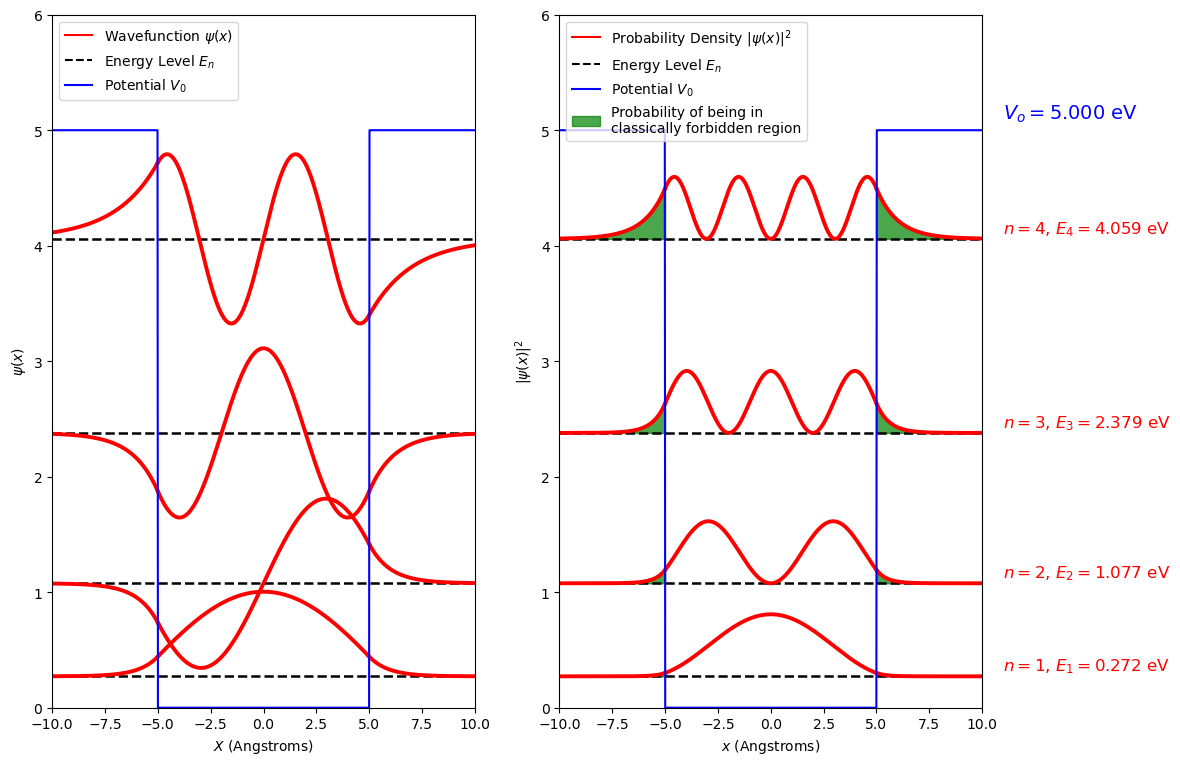

In [35]:
#set the potential depth and width
Vo=5
L=10

#find the energies of the states for the given Vo and L
E_vals, nstates = find_state_energies(Vo, L)

fig, ax = plt.subplots(1,2, figsize=(12,9))

#create x values for each of region I, II & III
X_lef = np.linspace(-L, -L/2.0, 900,endpoint=True)
X_mid = np.linspace(-L/2.0, L/2.0, 900,endpoint=True)
X_rig = np.linspace(L/2.0, L, 900,endpoint=True)

#set some figure paramters
ax[0].axis([-L,L,0.0,1.2*Vo])
ax[0].set_xlabel(r'$X$ (Angstroms)')
ax[0].set_ylabel(r'$\psi(x)$')

# Define the maximum amplitude of the wavefunction
if (nstates > 1):
    amp = np.sqrt((E_vals[1]-E_vals[0])/1.5)
else:
    amp = np.sqrt((Vo-E_vals[0])/1.5)
    
# Plot the wavefunctions
for n in range(1,nstates+1):
    ax[0].hlines(E_vals[n-1], -L, L, linewidth=1.8, linestyle='--', color="black")
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # Ploting odd wavefunction
    if (n%2==0):
        ax[0].plot(X_lef,E_vals[n-1]-amp*np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(a0*X_lef), color="red", label="", linewidth=2.8)
        ax[0].plot(X_mid,E_vals[n-1]+amp*np.sin(k*X_mid), color="red", label="", linewidth=2.8)
        ax[0].plot(X_rig,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(-a0*X_rig), color="red", label="", linewidth=2.8)
    # Plot even wavefunction
    else:
        ax[0].plot(X_lef,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(a0*X_lef), color="red", label="", linewidth=2.8)
        ax[0].plot(X_mid,E_vals[n-1]+amp*np.cos(k*X_mid), color="red", label="", linewidth=2.8)
        ax[0].plot(X_rig,E_vals[n-1]+amp*np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(-a0*X_rig), color="red", label="", linewidth=2.8)

#create the potential
x = np.linspace(-L,L,1000)
Vx = potential(x, Vo, L)
ax[0].plot(x,Vx, color='blue',linewidth=1.5)

#create a legend
handles, labels = ax[0].get_legend_handles_labels()
line = Line2D([0], [0], label='Wavefunction $\psi(x)$', color='red', linestyle='-')
handles.append(line)
line = Line2D([0], [0], label='Energy Level $E_n$', color='black', linestyle='--')
handles.append(line)
line = Line2D([0], [0], label='Potential $V_0$', color='blue', linestyle='-')
handles.append(line)
ax[0].legend(handles=handles, loc=2);

#start plotting the probability densities
#axis properties for probability densities
ax[1].axis([-L,L,0.0,1.2*Vo])
ax[1].set_xlabel(r'$x$ (Angstroms)')
ax[1].set_ylabel(r'$|\psi(x)|^2$')

#Label the potential
str1="$V_o = %.3f$ eV"%(Vo)
ax[1].text(1.1*L, 1.02*Vo, str1, fontsize=14, color="blue")

# Defining the maximum amplitude of the probability density
if (nstates > 1):
    amp = (E_vals[1]-E_vals[0])/1.5
else:
    amp = (Vo-E_vals[0])/1.5

# Plot the probability densities
for n in range(1,nstates+1):
    ax[1].hlines(E_vals[n-1], -L, L, linewidth=1.8, linestyle='--', color="black")
    str1="$n = "+str(n)+r"$, $E_"+str(n)+r" = %.3f$ eV"%(E_vals[n-1])
    ax[1].text(1.1*L, E_vals[n-1]+0.01*Vo, str1, fontsize=12, color="red")
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # Plot odd probability densities
    if (n%2==0):
        Y_lef = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(a0*X_lef))**2
        ax[1].plot(X_lef,Y_lef, color="red", linewidth=2.8)
        ax[1].fill_between(X_lef, E_vals[n-1], Y_lef, color="green", alpha=0.7)
        ax[1].plot(X_mid,E_vals[n-1]+amp*(np.sin(k*X_mid))**2, color="red", label="", linewidth=2.8)
        Y_rig = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.sin(k*L/2.0)*np.exp(-a0*X_rig))**2
        ax[1].plot(X_rig,Y_rig, color="red", linewidth=2.8)
        ax[1].fill_between(X_rig, E_vals[n-1], Y_rig, color="green", alpha=0.7)
    # Plot even probability densities
    else:
        Y_lef = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(a0*X_lef))**2
        ax[1].plot(X_lef,Y_lef, color="red", linewidth=2.8)
        ax[1].fill_between(X_lef, E_vals[n-1], Y_lef, color="green", alpha=0.7)
        ax[1].plot(X_mid,E_vals[n-1]+amp*(np.cos(k*X_mid))**2, color="red", label="", linewidth=2.8)
        Y_rig = E_vals[n-1]+amp*(np.exp(a0*L/2.0)*np.cos(k*L/2.0)*np.exp(-a0*X_rig))**2
        ax[1].plot(X_rig,Y_rig, color="red", linewidth=2.8)
        ax[1].fill_between(X_rig, E_vals[n-1], Y_rig, color="green", alpha=0.7)


#create a legend
handles, labels = ax[1].get_legend_handles_labels()
line = Line2D([0], [0], label='Probability Density $|\psi(x)|^2$', color='red', linestyle='-')
handles.append(line)
line = Line2D([0], [0], label='Energy Level $E_n$', color='black', linestyle='--')
handles.append(line)
line = Line2D([0], [0], label='Potential $V_0$', color='blue', linestyle='-')
handles.append(line)
patch = mpatches.Patch(color='green', alpha=0.7, label='Probability of being in \nclassically forbidden region')
handles.append(patch)
ax[1].legend(handles=handles, loc=2);

ax[1].plot(x,Vx, color='blue',linewidth=1.5)

plt.show()

plt.show()


#figstring = 'Figure 2.6.'+str(fig_no)+': label.'
#fig_no+=1
#display(Markdown(figstring))

- From these plots we can explain some of the behaviour of the energy levels as $L$ and $V_0$ are changed.

- The first thing to note from the diagram above is that the wavefunction extend outside the potential, they enter what is sometime called the classically forbidden region. 
- As with the potential step the quantum description of the particle allows it to tunnel into a region where the potential is larger than the energy of the particle. This is indicated by the shaded green area in the probability density plot. Note, this gets larger as the value $V_0-E$ approaches zero. 

### Tunneling of particle in the box

- **The tunneling probability** correspond to the area outside the box that has non-zero values of probability density. In the graphicaly representation, those areas are shaded in green. The integration of those areas provide the probability that the particle will tunnel outside the classically allowed region. 

$$ 
P\left(-\frac{L}{2}>x>\frac{L}{2}\right)= \frac{\text{The area of the probability density that is shaded green}}{\text{The total area of the probability density}}\\
=\large{\frac{\int^{\frac{-L}{2}}_{-\infty} |\psi(x)|^2\ dx +\int^{+\infty}_{\frac{L}{2}} |\psi(x)|^2\ dx }{\int_{-\infty}^{+\infty} |\psi(x)|^2\ dx }}
$$

- We can calculate $P(-L/2>x>L/2)$, i.e. the size of the shaded green area, as a percentage of the total area:

In [36]:
#@title  { vertical-output: true, form-width: "60%", display-mode: "form" }
print ("\nThe tunneling probabilities are:")
for n in range(1,nstates+1):
    k = 2.0*np.sqrt(E_vals[n-1])*val
    a0 = 2.0*np.sqrt(Vo-E_vals[n-1])*val
    # For odd solution
    if (n%2==0):
        C = 1.0
        D = np.exp(a0*L/2.0)*np.sin(k*L/2.0)*C
        prob = D*D*2.0*k*np.exp(-a0*L)/(B*B*a0*(k*L-np.sin(k*L))+D*D*2.0*k*np.exp(-a0*L))
    # For even solution
    else:
        B = 1.0
        D = np.exp(a0*L/2.0)*np.cos(k*L/2.0)*B
        prob = D*D*2.0*k*np.exp(-a0*L)/(B*B*a0*(k*L+np.sin(k*L))+D*D*2.0*k*np.exp(-a0*L))
    print("  State #%3d tunneling probability = %5.2f%%" % (n,100*prob))


The tunneling probabilities are:
  State #  1 tunneling probability =  0.83%
  State #  2 tunneling probability =  3.55%
  State #  3 tunneling probability =  9.25%
  State #  4 tunneling probability = 23.30%




### A comparison between the energies of an infinite and finte square well

These values show what we have already deduced, that the closer the state is to the top of the potential the easier it is to spread outside of the potential. How does this effect the energy levels? Lower in the potential the wavelength of the wavfunction is more closely related to the width of the potential than it is higher in the potential. Compare the same width potential for the infinite and finite square well below.

In [39]:
h=6.62607e-34    #planck's constant in joules
me=9.1093837e-31  # mass of an electron in kg

def En_infinite_square_well(n,L):
    return n**2*h**2/(8*me*(L*1e-10)**2*1.6e-19)

def compare_infinite_and_finite_square_wells(Vo, L):
    # Generating the graph
    fig, axes = plt.subplots(1, 2, figsize=(9,6), layout='constrained')
    
    nmax = 1
    axes[0].spines['right'].set_color('none')
    axes[0].yaxis.tick_left()
    axes[0].spines['bottom'].set_color('none')
    axes[0].axes.get_xaxis().set_visible(False)
    axes[0].spines['top'].set_color('none')
    axes[0].axis([0.0,10.0,0.0,1.1*Vo])
    axes[0].set_ylabel(r'$E_n$ (eV)')   
    while En_infinite_square_well(nmax, L) < Vo:
        str1="$n = "+str(nmax)+r"$, $E_"+str(nmax)+r" = %.3f$ eV"%(En_infinite_square_well(nmax, L))
        if (nmax)%2:
            statecolour = 'red'
        else:
            statecolour = 'green'
        axes[0].text(6.5, En_infinite_square_well(nmax, L), str1, fontsize=12, color=statecolour)
        axes[0].hlines(En_infinite_square_well(nmax, L), 0.0, 6.3, linewidth=1.8, linestyle='--', color=statecolour)       
        nmax+=1
        
    energies, nstates = find_state_energies(Vo, L)
    ydata = np.sqrt(Vo-energies)
    ##draw energy levels
    axes[1].spines['right'].set_color('none')
    axes[1].yaxis.tick_left()
    axes[1].spines['bottom'].set_color('none')
    axes[1].axes.get_xaxis().set_visible(False)
    axes[1].spines['top'].set_color('none')
    axes[1].axis([0.0,10.0,0.0,1.1*Vo])
    axes[1].set_ylabel(r'$E_n$ (eV)')
    
    for n in range(0,nstates):
        str1="$n = "+str(n+1)+r"$, $E_"+str(n+1)+r" = %.3f$ eV"%(energies[n])
        if (n+1)%2:
            statecolour = 'red'
        else:
            statecolour = 'green'
        axes[1].text(6.5, energies[n]-0.005*Vo, str1, fontsize=12, color=statecolour)
        axes[1].hlines(energies[n], 0.0, 6.3, linewidth=1.8, linestyle='--', color=statecolour)
    str1="$V_o = %.3f$ eV"%(Vo)
    axes[1].text(6.5, Vo-0.01*Vo, str1, fontsize=12, color="blue")
    axes[1].hlines(Vo, 0.0, 6.3, linewidth=2.5, linestyle='-', color="blue")
    axes[1].hlines(0.0, 0.0, 6.3, linewidth=1.2, linestyle='-', color="black")
    
    plt.show()

Llabel = r"Vo"
nlabel = r"L"
interactive_plot = widgets.interactive(compare_infinite_and_finite_square_wells,Vo=widgets.FloatSlider(min=0.1, max=10, step=0.5, value=5, description=Llabel,orientation='horizontal'), 
                               L=widgets.FloatSlider(min=0.1, max=17, step=0.1, value=10, description=nlabel,orientation='horizontal'))
display(interactive_plot)
#figstring = 'Figure: On the left are the are the energy levels in the infinte square well. On the right are the energy levels for the finite square well of the same width but height Vo.'
#display(Markdown(figstring))

interactive(children=(FloatSlider(value=5.0, description='Vo', max=10.0, min=0.1, step=0.5), FloatSlider(value…

- Notice that at energies closer to zero the infinite and finite energies are closer. As the energy of the state gets closer to the top of the finite potential it is smaller in the finite well than the infinite well. Why? The higher energy states allow the wavefunction in the finite squre well to spread out so the wavelength will be longer in the finite square well compared to the infinite squre well. - A longer wavelength corresponds to a smaller value of $k$ (wavenumber) and hence a lower energy state. 